# Regresión Básica en Python

## ¿Qué es la Regresión?

La **regresión** es una técnica estadística utilizada para modelar la relación entre variables. Busca encontrar una función matemática que describa cómo una variable dependiente (Y) se relaciona con una o más variables independientes (X).

### Tipos de Regresión:
- **Regresión Lineal Simple**: Una variable independiente (X) y una dependiente (Y)
- **Regresión Lineal Múltiple**: Varias variables independientes (X₁, X₂, ..., Xₙ) y una dependiente (Y)
- **Regresión No Lineal**: Relaciones más complejas

### Aplicaciones Prácticas:
- Predicción de precios basados en características
- Análisis de tendencias en datos históricos
- Modelado de relaciones entre variables económicas
- Pronósticos de demanda

## 1. Importar Librerías Necesarias

Primero, importamos las librerías que necesitaremos para realizar análisis de regresión:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Generar Datos de Ejemplo

Crearemos un conjunto de datos simple para ilustrar la regresión lineal:

In [2]:
# Establecer semilla para reproducibilidad
np.random.seed(42)

# Generar datos: horas de estudio vs. calificaciones
X = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Horas de estudio
y = np.array([40, 45, 50, 55, 60, 65, 70, 75, 80])  # Calificaciones

# Crear un DataFrame para mejor visualización
df = pd.DataFrame({'Horas de Estudio': X.flatten(), 'Calificación': y})
print("Datos de Ejemplo:")
print(df)
print(f"\nTotal de muestras: {len(df)}")

Datos de Ejemplo:
   Horas de Estudio  Calificación
0                 2            40
1                 3            45
2                 4            50
3                 5            55
4                 6            60
5                 7            65
6                 8            70
7                 9            75
8                10            80

Total de muestras: 9


## 3. Entender la Regresión Lineal

La **ecuación de la regresión lineal simple** es:

$$y = mx + b$$

Donde:
- **y**: Lo que queremos predecir (ej: calificación)
- **x**: Lo que tenemos (ej: horas de estudio)
- **m**: Pendiente - cuánto sube y por cada unidad de x
- **b**: Valor inicial cuando x = 0

### ¿Cómo funciona?
El modelo busca encontrar los valores de **m** y **b** que mejor se ajusten a los datos. Intenta minimizar la diferencia entre lo que predice y los valores reales.

**Ejemplo práctico:** Si m=5 y b=40, significa que por cada hora de estudio, la calificación sube 5 puntos, y el valor base es 40.

## 4. Entrenar un Modelo de Regresión Lineal

Usaremos la clase `LinearRegression` de scikit-learn para ajustar nuestro modelo:

In [3]:
# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener parámetros
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

print("Parámetros del Modelo:")
print(f"Pendiente (m): {pendiente:.4f}")
print(f"Intercepto (b): {intercepto:.4f}")
print(f"\nEcuación: y = {pendiente:.4f}x + {intercepto:.4f}")

Parámetros del Modelo:
Pendiente (m): 5.0000
Intercepto (b): 30.0000

Ecuación: y = 5.0000x + 30.0000


## 5. Hacer Predicciones

Con el modelo entrenado, podemos hacer predicciones para nuevos valores:

In [4]:
# Hacer predicciones sobre datos de entrenamiento
y_pred = modelo.predict(X)

# Hacer predicciones sobre nuevos datos
nuevos_datos = np.array([[3.5], [5.5], [7.5]])
nuevas_predicciones = modelo.predict(nuevos_datos)

print("Predicciones para nuevos datos:")
print("-" * 40)
for x_val, y_pred_val in zip(nuevos_datos.flatten(), nuevas_predicciones):
    print(f"Horas de estudio: {x_val} → Calificación predicha: {y_pred_val:.2f}")

print("\n" + "="*40)
print("Comparación de predicciones:")
print("-" * 40)
comparacion = pd.DataFrame({
    'Horas': X.flatten(),
    'Calificación Real': y,
    'Calificación Predicha': y_pred.round(2)
})
print(comparacion)

Predicciones para nuevos datos:
----------------------------------------
Horas de estudio: 3.5 → Calificación predicha: 47.50
Horas de estudio: 5.5 → Calificación predicha: 57.50
Horas de estudio: 7.5 → Calificación predicha: 67.50

Comparación de predicciones:
----------------------------------------
   Horas  Calificación Real  Calificación Predicha
0      2                 40                   40.0
1      3                 45                   45.0
2      4                 50                   50.0
3      5                 55                   55.0
4      6                 60                   60.0
5      7                 65                   65.0
6      8                 70                   70.0
7      9                 75                   75.0
8     10                 80                   80.0


## 6. Evaluar el Desempeño del Modelo

Utilizamos métricas para evaluar qué tan bien nuestro modelo se ajusta a los datos:

In [5]:
# Calcular métricas de desempeño
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("¿QUÉ TAN BIEN PREDICE EL MODELO?")
print("=" * 50)
print(f"\nError promedio: {rmse:.2f} puntos")
print(f"  (En promedio, la predicción se equivoca {rmse:.2f} puntos)")
print(f"\nBondad del ajuste (R²): {r2:.4f}")
print(f"  (El modelo explica {r2*100:.1f}% de los datos)")
print("\n" + "=" * 50)

¿QUÉ TAN BIEN PREDICE EL MODELO?

Error promedio: 0.00 puntos
  (En promedio, la predicción se equivoca 0.00 puntos)

Bondad del ajuste (R²): 1.0000
  (El modelo explica 100.0% de los datos)



## 7. Visualizar los Resultados

Vamos a crear gráficos para visualizar el modelo, la línea de regresión y los residuos:

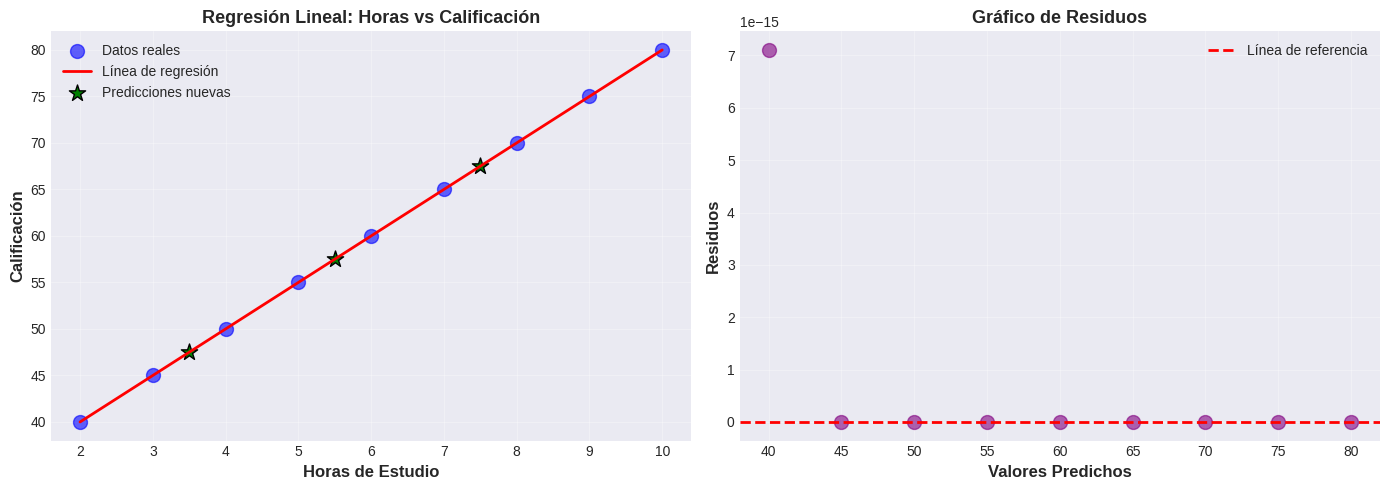

✓ Gráficos generados exitosamente


In [6]:
# Crear figura con múltiples subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Calcular residuos
residuos = y - y_pred

# Gráfico 1: Datos y Línea de Regresión
ax1 = axes[0]
ax1.scatter(X, y, color='blue', s=100, alpha=0.6, label='Datos reales')
ax1.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')

# Agregar puntos de predicción nuevos
ax1.scatter(nuevos_datos, nuevas_predicciones, color='green', s=150, marker='*', 
            label='Predicciones nuevas', edgecolors='black', linewidth=1)

ax1.set_xlabel('Horas de Estudio', fontsize=12, fontweight='bold')
ax1.set_ylabel('Calificación', fontsize=12, fontweight='bold')
ax1.set_title('Regresión Lineal: Horas vs Calificación', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Residuos
ax2 = axes[1]
ax2.scatter(y_pred, residuos, color='purple', s=100, alpha=0.6)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Línea de referencia')
ax2.set_xlabel('Valores Predichos', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residuos', fontsize=12, fontweight='bold')
ax2.set_title('Gráfico de Residuos', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Gráficos generados exitosamente")

## 8. Regresión Lineal Múltiple

Ahora veremos cómo extender el modelo a **múltiples variables independientes**. En este caso, predeciremos calificaciones usando múltiples características:

In [7]:
# Crear datos para regresión múltiple
# X1: Horas de estudio, X2: Horas de sueño, Y: Calificación
np.random.seed(42)

X_multiple = np.array([
    [2, 6],      # 2 horas estudio, 6 horas sueño
    [3, 7],
    [4, 5],
    [5, 8],
    [6, 6],
    [7, 7],
    [8, 8],
    [9, 6],
    [10, 8]
])

y_multiple = np.array([40, 48, 42, 65, 55, 70, 80, 65, 85])

# Crear DataFrame para visualización
df_multiple = pd.DataFrame({
    'Horas de Estudio': X_multiple[:, 0],
    'Horas de Sueño': X_multiple[:, 1],
    'Calificación': y_multiple
})

print("Datos para Regresión Múltiple:")
print(df_multiple)

# Entrenar modelo de regresión múltiple
modelo_multiple = LinearRegression()
modelo_multiple.fit(X_multiple, y_multiple)

# Obtener parámetros
coeficientes = modelo_multiple.coef_
intercepto_multiple = modelo_multiple.intercept_

print("\n" + "="*50)
print("MODELO DE REGRESIÓN MÚLTIPLE:")
print("="*50)
print(f"Intercepto (b): {intercepto_multiple:.4f}")
print(f"Coeficiente de Horas de Estudio (m1): {coeficientes[0]:.4f}")
print(f"Coeficiente de Horas de Sueño (m2): {coeficientes[1]:.4f}")
print(f"\nEcuación: y = {coeficientes[0]:.4f}*x1 + {coeficientes[1]:.4f}*x2 + {intercepto_multiple:.4f}")

# Hacer predicciones
y_pred_multiple = modelo_multiple.predict(X_multiple)

# Evaluar modelo
mse_multiple = mean_squared_error(y_multiple, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
r2_multiple = r2_score(y_multiple, y_pred_multiple)

print("\n" + "="*50)
print("MÉTRICAS DEL MODELO MÚLTIPLE:")
print("="*50)
print(f"RMSE: {rmse_multiple:.4f}")
print(f"R²: {r2_multiple:.4f}")
print(f"El modelo explica {r2_multiple*100:.2f}% de la variabilidad")

# Tabla de comparación
comparacion_multiple = pd.DataFrame({
    'Horas Estudio': X_multiple[:, 0],
    'Horas Sueño': X_multiple[:, 1],
    'Real': y_multiple,
    'Predicho': y_pred_multiple.round(2),
    'Error': (y_multiple - y_pred_multiple).round(2)
})
print("\n" + "="*50)
print("COMPARACIÓN DE PREDICCIONES:")
print("="*50)
print(comparacion_multiple)

Datos para Regresión Múltiple:
   Horas de Estudio  Horas de Sueño  Calificación
0                 2               6            40
1                 3               7            48
2                 4               5            42
3                 5               8            65
4                 6               6            55
5                 7               7            70
6                 8               8            80
7                 9               6            65
8                10               8            85

MODELO DE REGRESIÓN MÚLTIPLE:
Intercepto (b): -11.2657
Coeficiente de Horas de Estudio (m1): 4.0122
Coeficiente de Horas de Sueño (m2): 7.1268

Ecuación: y = 4.0122*x1 + 7.1268*x2 + -11.2657

MÉTRICAS DEL MODELO MÚLTIPLE:
RMSE: 1.9381
R²: 0.9836
El modelo explica 98.36% de la variabilidad

COMPARACIÓN DE PREDICCIONES:
   Horas Estudio  Horas Sueño  Real  Predicho  Error
0              2            6    40     39.52   0.48
1              3            7    48     50